# Importing The Libraries

In [57]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [58]:
df = pd.read_csv(r'C:\Users\Rajesh\Downloads/data.csv')

In [59]:
df.shape

(2227, 3)

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2227 entries, 0 to 2226
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      2222 non-null   float64
 1   x2      2224 non-null   float64
 2   y       2227 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 52.3 KB


# Cleaning Data

In [61]:
df.x1.isnull().sum()

5

In [62]:
df.dropna(how='any', inplace=True)

In [63]:
df.x1.isnull().sum()

0

In [64]:
df.x2.isnull().sum()

0

In [65]:
fig=px.box(df, y="x2")
fig.show()

In [66]:
import scipy.stats as stats

In [67]:
Q1 = df.quantile(q=.25)
Q3 = df.quantile(q=.75)
IQR = df.apply(stats.iqr)

data = df[~((df< (Q1-1.5*IQR)) | (df > (Q3+1.5*IQR))).any(axis=1)]

In [68]:
data.shape

(2217, 3)

In [69]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2217 entries, 0 to 2225
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      2217 non-null   float64
 1   x2      2217 non-null   float64
 2   y       2217 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 69.3 KB


In [70]:
data.columns

Index(['x1', 'x2', 'y'], dtype='object')

In [71]:
data.isnull().sum()

x1    0
x2    0
y     0
dtype: int64

In [72]:
y = data['y']
X = data.drop('y',axis = 1)

In [73]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: y, dtype: int64

### Standardazation

In [74]:
from sklearn.preprocessing import StandardScaler
standardized_data = StandardScaler().fit_transform(X)

In [75]:
standardized_data.shape

(2217, 2)

### Train Test Split

In [76]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(standardized_data,y,train_size = 0.80,random_state = 0)

### LogisticRegression

In [77]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train,y_train)

LogisticRegression()

In [78]:
y_pred = classifier.predict(X_test)

In [79]:
from sklearn import metrics
metrics.accuracy_score(y_test,y_pred)

0.7657657657657657

In [106]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      1.00      0.83       250
           1       1.00      0.46      0.63       194

    accuracy                           0.77       444
   macro avg       0.85      0.73      0.73       444
weighted avg       0.83      0.77      0.74       444



In [80]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report


In [81]:
import warnings
warnings.filterwarnings('ignore')
tuned_parameters = [{'solver':['newton-cg','lbfgs','liblinear','sag','saga'], 'C':[1,0.1,0.01,10,100],'penalty':['l1','l2','elasticnet']}]
evaluation_metrics = ['accuracy','precision','recall']
for i in evaluation_metrics:
    clf = GridSearchCV(LogisticRegression(), tuned_parameters, scoring='{}'.format(i))
    clf.fit(X_train, y_train)

    print("Best parameters set found on train set:")
    print(clf.best_params_)
    print(clf.best_estimator_)
    print()

    print(clf.score(X_test, y_test))


Best parameters set found on train set:
{'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}
LogisticRegression(C=1, solver='liblinear')

0.7657657657657657
Best parameters set found on train set:
{'C': 0.01, 'penalty': 'l2', 'solver': 'newton-cg'}
LogisticRegression(C=0.01, solver='newton-cg')

1.0
Best parameters set found on train set:
{'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}
LogisticRegression(C=1, solver='liblinear')

0.4639175257731959


In [82]:
con_metric = metrics.confusion_matrix(y_test,y_pred)
con_metric

array([[250,   0],
       [104,  90]], dtype=int64)

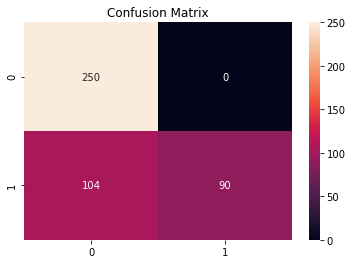

In [83]:
sns.heatmap(con_metric,annot=True,fmt='d')
plt.title('Confusion Matrix')
plt.show()

### Support Vector Machine

In [84]:
from sklearn.svm import SVC
classifier1 = SVC()
classifier1.fit(X_train, y_train)

SVC()

In [85]:
y_pred1 = classifier1.predict(X_test)

In [86]:
# calculate accuracy of class predictions
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred1)

0.954954954954955

In [107]:
print(metrics.classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       250
           1       0.96      0.94      0.95       194

    accuracy                           0.95       444
   macro avg       0.96      0.95      0.95       444
weighted avg       0.96      0.95      0.95       444



In [87]:
con_metric = metrics.confusion_matrix(y_test, y_pred1)
con_metric

array([[242,   8],
       [ 12, 182]], dtype=int64)

In [113]:
import warnings
warnings.filterwarnings('ignore')
tuned_parameters = [{'kernel': ['rbf'], 'gamma': np.random.rand(3) , 'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]
evaluation_metrics = ['accuracy','precision','recall']
for i in evaluation_metrics:
    clf = RandomizedSearchCV(SVC(), tuned_parameters, scoring='{}'.format(i))
    clf.fit(X_train, y_train)

    print("Best parameters set found on train set:")
    print(clf.best_params_)
    print(clf.best_estimator_)
    print()

    print(clf.score(X_test, y_test))


Best parameters set found on train set:
{'kernel': 'rbf', 'gamma': 0.4311702005428498, 'C': 100}
SVC(C=100, gamma=0.4311702005428498)

0.9594594594594594
Best parameters set found on train set:
{'kernel': 'linear', 'C': 10}
SVC(C=10, kernel='linear')

1.0
Best parameters set found on train set:
{'kernel': 'rbf', 'gamma': 0.3346559518373753, 'C': 100}
SVC(C=100, gamma=0.3346559518373753)

0.9587628865979382


### KNeighborsClassifier

In [89]:
from sklearn.neighbors import KNeighborsClassifier
classifier2 = KNeighborsClassifier()
classifier2.fit(X_train, y_train)

KNeighborsClassifier()

In [90]:
y_pred2 = classifier2.predict(X_test)

In [91]:
# calculate accuracy of class predictions
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred2)

0.9527027027027027

In [108]:
print(metrics.classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96       250
           1       0.95      0.94      0.95       194

    accuracy                           0.95       444
   macro avg       0.95      0.95      0.95       444
weighted avg       0.95      0.95      0.95       444



In [92]:
import warnings
warnings.filterwarnings('ignore')
tuned_parameters = [{'n_neighbors':[1, 2, 3, 4, 5], 'p':[1, 2, 3]}]

evaluation_metrics = ['accuracy','precision','recall']
for i in evaluation_metrics:
    clf = RandomizedSearchCV(KNeighborsClassifier(), tuned_parameters, scoring='{}'.format(i))
    clf.fit(X_train, y_train)

    print("Best parameters set found on train set:")
    print(clf.best_params_)
    print(clf.best_estimator_)
    print()

    print(clf.score(X_test, y_test))

Best parameters set found on train set:
{'p': 2, 'n_neighbors': 5}
KNeighborsClassifier()

0.9527027027027027
Best parameters set found on train set:
{'p': 3, 'n_neighbors': 2}
KNeighborsClassifier(n_neighbors=2, p=3)

0.9728260869565217
Best parameters set found on train set:
{'p': 1, 'n_neighbors': 1}
KNeighborsClassifier(n_neighbors=1, p=1)

0.9484536082474226


### DecisionTreeClassifier

In [93]:
from sklearn.tree import DecisionTreeClassifier
classifier3 = DecisionTreeClassifier(max_depth = 2)
classifier3.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

In [94]:
y_test_pred = classifier3.predict(X_test)

In [95]:
metrics.accuracy_score(y_test, y_test_pred)

0.7297297297297297

In [109]:
print(metrics.classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96       250
           1       0.95      0.94      0.95       194

    accuracy                           0.95       444
   macro avg       0.95      0.95      0.95       444
weighted avg       0.95      0.95      0.95       444



In [112]:
con_metric = metrics.confusion_matrix(y_test, y_test_pred)
con_metric

array([[136, 114],
       [  6, 188]], dtype=int64)

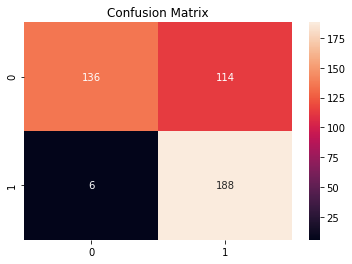

In [97]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(con_metric, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.show()


In [98]:
import warnings
warnings.filterwarnings('ignore')
tuned_parameters = [{'max_depth':[2,3,4,6,7,8,9,25]}]

evaluation_metrics = ['accuracy','precision','recall']
for i in evaluation_metrics:
    clf = RandomizedSearchCV(DecisionTreeClassifier(), tuned_parameters, scoring='{}'.format(i))
    clf.fit(X_train, y_train)

    print("Best parameters set found on train set:")
    print(clf.best_params_)
    print(clf.best_estimator_)
    print()

    print(clf.score(X_test, y_test))

Best parameters set found on train set:
{'max_depth': 7}
DecisionTreeClassifier(max_depth=7)

0.9391891891891891
Best parameters set found on train set:
{'max_depth': 4}
DecisionTreeClassifier(max_depth=4)

1.0
Best parameters set found on train set:
{'max_depth': 7}
DecisionTreeClassifier(max_depth=7)

0.9226804123711341


### RandomForestClassifier

In [99]:
from sklearn.ensemble import RandomForestClassifier
classifier4 = RandomForestClassifier(max_depth = 2)
classifier4.fit(X_train, y_train)

RandomForestClassifier(max_depth=2)

In [100]:
y_test_pred1 = classifier4.predict(X_test)

In [101]:
metrics.accuracy_score(y_test, y_test_pred1)

0.8873873873873874

In [110]:
print(metrics.classification_report(y_test, y_test_pred1))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91       250
           1       0.99      0.75      0.85       194

    accuracy                           0.89       444
   macro avg       0.91      0.87      0.88       444
weighted avg       0.90      0.89      0.88       444



In [102]:
import warnings
warnings.filterwarnings('ignore')
tuned_parameters = [{'n_estimators':[10,20,25,50,100]}]

evaluation_metrics = ['accuracy','precision','recall']
for i in evaluation_metrics:
    clf = RandomizedSearchCV(RandomForestClassifier(), tuned_parameters, scoring='{}'.format(i))
    clf.fit(X_train, y_train)

    print("Best parameters set found on train set:")
    print(clf.best_params_)
    print(clf.best_estimator_)
    print()

    print(clf.score(X_test, y_test))

Best parameters set found on train set:
{'n_estimators': 25}
RandomForestClassifier(n_estimators=25)

0.9572072072072072
Best parameters set found on train set:
{'n_estimators': 50}
RandomForestClassifier(n_estimators=50)

0.9481865284974094
Best parameters set found on train set:
{'n_estimators': 25}
RandomForestClassifier(n_estimators=25)

0.9432989690721649


In [103]:
con_metric = metrics.confusion_matrix(y_test, y_test_pred1)
con_metric

array([[249,   1],
       [ 49, 145]], dtype=int64)

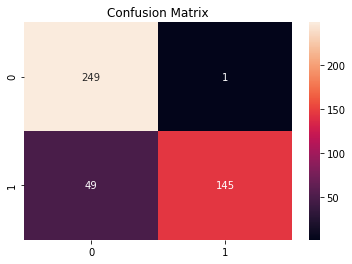

In [104]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(con_metric, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.show()

### observation

After applying all the models svm got best metrics compare to other models, svm is more geomtryically high and it is best for this data and also after tuning with hyper parameters to all the models svm gives best results rbf and linear kenalization techniques.